In [1]:
# import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# load the dataset
data = pd.read_csv('fake-news-train.csv', encoding = 'unicode_escape')

In [3]:
# print the dataset for the first five rows
print(data.head())

   id                                              title              author  \
0   0  House Dem Aide: We Didnât Even See Comeyâs...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didnât Even See Comeyâs...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  


In [4]:
# print the dataset for the last five rows
print(data.tail())

          id                                              title  \
20795  20795  Rapper T.I.: Trump a âPoster Child For White...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macyâs Is Said to Receive Takeover Approach ...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
20795                              Jerome Hudson   
20796                           Benjamin Hoffman   
20797  Michael J. de la Merced and Rachel Abrams   
20798                                Alex Ansary   
20799                              David Swanson   

                                                    text  label  
20795  Rapper T. I. unloaded on black celebrities who...      0  
20796  When the Green Bay Packers lost to the Washing...      0  
20797  The Macyâs of today grew from the union of s...      0  
20798  NATO, Russia 

In [5]:
# shape of the dataset
print(data.shape)

(20800, 5)


In [6]:
# To check if there are any NULL Values in the dataset
print(data.isnull().sum())

id           0
title      558
author    1957
text        39
label        0
dtype: int64


# Observation:

From the above observation, it is seen that title and author are the two columns that has NULL Values in it

In [7]:
# Get the Independent feature
X = data.drop(columns = 'label')
print(X)

          id                                              title  \
0          0  House Dem Aide: We Didnât Even See Comeyâs...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a âPoster Child For White...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macyâs Is Said to Receive Takeover Approach ...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [8]:
# Get the dependent feature 
Y = data['label']

In [9]:
print(Y)

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64


In [10]:
# copy the dataset into another file
messages = data.copy()
print(messages.head())

   id                                              title              author  \
0   0  House Dem Aide: We Didnât Even See Comeyâs...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didnât Even See Comeyâs...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  


In [11]:
# set the index for the messages dataset
messages.reset_index(inplace = True)

In [12]:
dataset = messages.head(10)

In [13]:
print(dataset)

   index  id                                              title  \
0      0   0  House Dem Aide: We Didnât Even See Comeyâs...   
1      1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2      2   2                  Why the Truth Might Get You Fired   
3      3   3  15 Civilians Killed In Single US Airstrike Hav...   
4      4   4  Iranian woman jailed for fictional unpublished...   
5      5   5  Jackie Mason: Hollywood Would Love Trump if He...   
6      6   6  Life: Life Of Luxury: Elton Johnâs 6 Favorit...   
7      7   7  BenoÃ®t Hamon Wins French Socialist Partyâs ...   
8      8   8  Excerpts From a Draft Script for Donald Trumpâ...   
9      9   9  A Back-Channel Plan for Ukraine and Russia, Co...   

                         author  \
0                 Darrell Lucus   
1               Daniel J. Flynn   
2            Consortiumnews.com   
3               Jessica Purkiss   
4                Howard Portnoy   
5               Daniel Nussbaum   
6                

In [14]:
# get the text content at the sixth index position of the dataset
messages['text'][6]

'Ever wonder how Britainâ\x80\x99s most iconic pop pianist gets through a long flight? Here are the six pictures of sharks Sir Elton John likes to stare at to pass the time on an airplane. 1. A Shark Swimming \nSit next to Elton John on a flight and youâ\x80\x99ll see a man living in the lap of luxury, as he immediately tapes this photo of a shark darting through the ocean over his window to stare at throughout the trip. The platinum-selling artist has been known to pull his window shade down to make the shark disappear, and then quickly retract it to mark the animalâ\x80\x99s triumphant return. He will often repeat this act dozens of times per flight. 2. A Great White Shark Leaping Into The Air \nWhen youâ\x80\x99re an international pop sensation worth an estimated $450 million, people go the extra mile to make you happy. Flight crews are instructed to place this photo of a breaching great white in Elton Johnâ\x80\x99s seat-back pocket before he even boards the plane. The five-time Gr

In [15]:
answer = messages['text'][6]

In [16]:
print(answer)

Ever wonder how Britainâs most iconic pop pianist gets through a long flight? Here are the six pictures of sharks Sir Elton John likes to stare at to pass the time on an airplane. 1. A Shark Swimming 
Sit next to Elton John on a flight and youâll see a man living in the lap of luxury, as he immediately tapes this photo of a shark darting through the ocean over his window to stare at throughout the trip. The platinum-selling artist has been known to pull his window shade down to make the shark disappear, and then quickly retract it to mark the animalâs triumphant return. He will often repeat this act dozens of times per flight. 2. A Great White Shark Leaping Into The Air 
When youâre an international pop sensation worth an estimated $450 million, people go the extra mile to make you happy. Flight crews are instructed to place this photo of a breaching great white in Elton Johnâs seat-back pocket before he even boards the plane. The five-time Grammy winner loves to pull the ima

# Perform the Data Preprocessing of the text

In [17]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
# create the object for Porter Stemmer
ps = PorterStemmer()

In [18]:
# define the empty corpus
corpus = []
for i in range(0, len(dataset)):
    # replace all the characters except small and upper case letters with ' '
    review = re.sub('[^a-zA-Z]',' ', str(dataset['text'][i]))
    # write the text in lower case
    review = review.lower()
    # split the text
    review = review.split()
    
    # extract all the non stop words and stem it
    review = [ps.stem(word) for word in review if(word not in stopwords.words('english'))]
    # join all the words
    review = ' '.join(review)
    # append all the text in corpus
    corpus.append(review)

In [19]:
print(corpus)

['hous dem aid even see comey letter jason chaffetz tweet darrel lucu octob subscrib jason chaffetz stump american fork utah imag courtesi michael jolley avail creativ common licens apolog keith olbermann doubt worst person world week fbi director jame comey accord hous democrat aid look like also know second worst person well turn comey sent infam letter announc fbi look email may relat hillari clinton email server rank democrat relev committe hear comey found via tweet one republican committe chairmen know comey notifi republican chairmen democrat rank member hous intellig judiciari oversight committe agenc review email recent discov order see contain classifi inform long letter went oversight committe chairman jason chaffetz set polit world ablaz tweet fbi dir inform fbi learn exist email appear pertin investig case reopen jason chaffetz jasoninthehous octob cours know case comey actual say review email light unrel case know anthoni weiner sext teenag appar littl thing fact matter c

In [20]:
# Apply the TfidfVectorizer Vectorizer on the corpus text and create the Bag of Words for it

from sklearn.feature_extraction.text import TfidfVectorizer

# create the object for Tfidf Vectorizer
tfidf = TfidfVectorizer(max_features = 500, ngram_range = (1,3))

# using the obejct for tfidf vectorizer transform the data and convert it into array
X = tfidf.fit_transform(corpus).toarray()

In [21]:
X.shape

(10, 500)

In [22]:
Y = dataset['label'].head(10)

In [23]:
Y .shape

(10,)

In [24]:
# Divide the independent and dependent variables into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1, random_state = 0)

In [25]:
# get all the feature names from Tfidf Vectorizer
tfidf.get_feature_names()

['abl',
 'access',
 'accord',
 'accur',
 'achiev',
 'act',
 'address',
 'administr',
 'advanc',
 'advis',
 'afford',
 'afghan',
 'afghanistan',
 'african',
 'african american',
 'agenc',
 'agent',
 'ago',
 'aid',
 'airstrik',
 'alli',
 'allow',
 'alreadi',
 'also',
 'altern',
 'ambassador',
 'america',
 'american',
 'american peopl',
 'answer',
 'anyth',
 'appear',
 'approach',
 'art',
 'artemenko',
 'artemenko said',
 'articl',
 'ask',
 'assert',
 'assess',
 'associ',
 'attack',
 'back',
 'becom',
 'behavior',
 'behavior scienc',
 'behind',
 'believ',
 'best',
 'better',
 'break',
 'bring',
 'bureau',
 'bush',
 'busi',
 'bust',
 'call',
 'came',
 'campaign',
 'candid',
 'cannot',
 'care',
 'case',
 'certainli',
 'chaffetz',
 'chairmen',
 'chanc',
 'chang',
 'charg',
 'choic',
 'church',
 'citi',
 'civilian',
 'civilian kill',
 'claim',
 'class',
 'clear',
 'clinton',
 'close',
 'cohen',
 'cohen mr',
 'cohen said',
 'colleg',
 'combat',
 'come',
 'comey',
 'comey letter',
 'committe',


In [26]:
# get all the parameter names from Tfidf Vectorizer
tfidf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 500,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [27]:
# with the help of the training data and feature names construct a dataframe
count_df = pd.DataFrame(X_train, columns = tfidf.get_feature_names())

In [28]:
print(count_df)

        abl    access    accord  accur    achiev       act   address  \
0  0.058987  0.132188  0.000000    0.0  0.044949  0.034963  0.017481   
1  0.000000  0.000000  0.087681    0.0  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.007693    0.0  0.009890  0.000000  0.000000   
3  0.000000  0.000000  0.000000    0.0  0.000000  0.000000  0.077221   
4  0.000000  0.000000  0.000000    0.0  0.000000  0.028307  0.000000   
5  0.000000  0.000000  0.021681    0.0  0.000000  0.000000  0.021681   
6  0.054733  0.000000  0.000000    0.0  0.000000  0.000000  0.024331   
7  0.000000  0.000000  0.065425    0.0  0.000000  0.021808  0.000000   
8  0.000000  0.000000  0.000000    0.0  0.000000  0.000000  0.000000   

   administr    advanc     advis  ...     worst  worst person     worth  \
0   0.039325  0.019662  0.000000  ...  0.000000      0.000000  0.000000   
1   0.000000  0.000000  0.000000  ...  0.000000      0.000000  0.000000   
2   0.017306  0.017306  0.029671  ...  0.000000      0

In [29]:
# display the first five rows of the dataframe
print(count_df.head())

        abl    access    accord  accur    achiev       act   address  \
0  0.058987  0.132188  0.000000    0.0  0.044949  0.034963  0.017481   
1  0.000000  0.000000  0.087681    0.0  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.007693    0.0  0.009890  0.000000  0.000000   
3  0.000000  0.000000  0.000000    0.0  0.000000  0.000000  0.077221   
4  0.000000  0.000000  0.000000    0.0  0.000000  0.028307  0.000000   

   administr    advanc     advis  ...  worst  worst person     worth  \
0   0.039325  0.019662  0.000000  ...    0.0           0.0  0.000000   
1   0.000000  0.000000  0.000000  ...    0.0           0.0  0.000000   
2   0.017306  0.017306  0.029671  ...    0.0           0.0  0.000000   
3   0.000000  0.000000  0.000000  ...    0.0           0.0  0.000000   
4   0.000000  0.000000  0.000000  ...    0.0           0.0  0.036392   

      would   written      year       yet      york     young  young peopl  
0  0.069925  0.000000  0.000000  0.019662  0.022474  0.02

# PLOTTING THE CONFUSION MATRIX

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [35]:
Y_test.shape

(1,)

# MULTINOMIAL NB ALGORITHM

In [47]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()

import itertools

In [52]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

In [53]:
# train the model
classifier.fit(X_train, Y_train)

# predict the model
pred = classifier.predict(X_test)
print(pred)

[0]


In [54]:
# find out the accuracy between the actual value and the predicted value
score = accuracy_score(pred, Y_test)
print(score * 100.0)

0.0


In [55]:
# create the confusion matrix
cm = confusion_matrix(Y_test, pred)
print(cm)

[[0 0]
 [1 0]]


Confusion matrix, without normalization


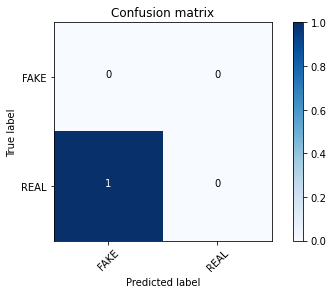

In [57]:
# plot the confusion matrix of the graph
plot_confusion_matrix(cm , classes = ['FAKE','REAL'])

# Passive Aggressive Classifier Algorithm

In [60]:
from sklearn.linear_model import PassiveAggressiveClassifier

# create the object for Passive Aggressive Classifier Algorithm
linear_clf = PassiveAggressiveClassifier(max_iter = 50)

In [62]:
# train the model
linear_clf.fit(X_train, Y_train)

# predict the model
pred = linear_clf.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
ac_score = accuracy_score(pred, Y_test)
print(ac_score * 100.0)

0.0


In [67]:
from sklearn.metrics import classification_report

cr = classification_report(pred, Y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(pred, Y_test)
print(cm)

[[0 1]
 [0 0]]


Confusion matrix, without normalization


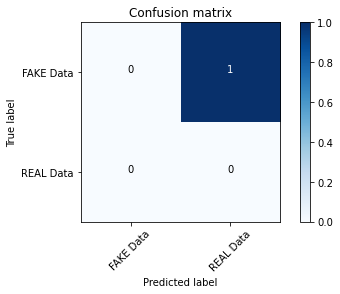

In [70]:
plot_confusion_matrix(cm, classes = ['FAKE Data','REAL Data'])

# Multinomial Classifier with Hyperparameter

In [71]:
classifier=MultinomialNB(alpha=0.1)

In [73]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,Y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(Y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

Alpha: 0.0, Score : 0.0
Alpha: 0.1, Score : 1.0
Alpha: 0.2, Score : 1.0
Alpha: 0.30000000000000004, Score : 1.0
Alpha: 0.4, Score : 1.0
Alpha: 0.5, Score : 1.0
Alpha: 0.6000000000000001, Score : 1.0
Alpha: 0.7000000000000001, Score : 0.0
Alpha: 0.8, Score : 0.0
Alpha: 0.9, Score : 0.0


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


In [81]:
## Get Features names
feature_names = tfidf.get_feature_names()

In [82]:
classifier.coef_[0]

array([-6.20158648, -6.28888459, -6.06160763, -6.28888459, -6.28888459,
       -6.20866512, -6.24913381, -6.28888459, -6.24881582, -6.28888459,
       -6.28888459, -6.06950055, -6.01671994, -6.28888459, -6.28888459,
       -6.25318223, -6.28888459, -6.28888459, -6.12189947, -6.12000119,
       -6.24428322, -6.28888459, -6.17319526, -6.20420345, -6.28888459,
       -6.28888459, -6.28888459, -6.13943224, -6.28888459, -6.25318223,
       -6.24881582, -6.25318223, -6.28888459, -6.28888459, -6.28888459,
       -6.28888459, -5.96988529, -6.28888459, -6.28888459, -6.28888459,
       -6.28888459, -6.08345312, -6.24278613, -6.24881582, -6.28888459,
       -6.28888459, -6.23718078, -6.28888459, -6.28888459, -6.28888459,
       -6.28888459, -6.28888459, -6.02142809, -6.28888459, -6.28888459,
       -6.28888459, -6.28888459, -6.15248878, -6.28888459, -6.28888459,
       -6.28888459, -6.28888459, -6.15313997, -6.28888459, -5.71814728,
       -6.09013413, -6.28888459, -6.28888459, -6.28888459, -6.19

In [83]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-5.596299966176707, 'shark'),
 (-5.669070220069265, 'kill'),
 (-5.718147280677028, 'chaffetz'),
 (-5.728411617260946, 'stori'),
 (-5.750356863819547, 'elton'),
 (-5.773309703697258, 'civilian'),
 (-5.780250803337715, 'stone'),
 (-5.780250803337715, 'prison'),
 (-5.823301634756726, 'strike'),
 (-5.850827239062512, 'comey'),
 (-5.892381530325446, 'us'),
 (-5.932547140329325, 'elton john'),
 (-5.932690810097497, 'death'),
 (-5.96333922895913, 'committe'),
 (-5.969885291003817, 'written'),
 (-5.969885291003817, 'draft'),
 (-5.969885291003817, 'articl'),
 (-5.97775538565459, 'found'),
 (-5.983798981365352, 'stare'),
 (-5.983798981365352, 'pictur')]

In [84]:
## Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-6.288884585511264, 'access'),
 (-6.288884585511264, 'accur'),
 (-6.288884585511264, 'achiev'),
 (-6.288884585511264, 'administr'),
 (-6.288884585511264, 'advis'),
 (-6.288884585511264, 'afford'),
 (-6.288884585511264, 'african'),
 (-6.288884585511264, 'african american'),
 (-6.288884585511264, 'agent'),
 (-6.288884585511264, 'ago'),
 (-6.288884585511264, 'allow'),
 (-6.288884585511264, 'altern'),
 (-6.288884585511264, 'ambassador'),
 (-6.288884585511264, 'america'),
 (-6.288884585511264, 'american peopl'),
 (-6.288884585511264, 'approach'),
 (-6.288884585511264, 'art'),
 (-6.288884585511264, 'artemenko'),
 (-6.288884585511264, 'artemenko said'),
 (-6.288884585511264, 'ask'),
 (-6.288884585511264, 'assert'),
 (-6.288884585511264, 'assess'),
 (-6.288884585511264, 'associ'),
 (-6.288884585511264, 'behavior'),
 (-6.288884585511264, 'behavior scienc'),
 (-6.288884585511264, 'believ'),
 (-6.288884585511264, 'best'),
 (-6.288884585511264, 'better'),
 (-6.288884585511264, 'break'),
 (-6.288